In [16]:
import tsfresh
from tsfresh import feature_selection
from tsfresh import extract_features, select_features
import os
import warnings
from abc import ABC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from collections import Counter
import torch.nn as nn
import gc
import time
import torch
import numpy as np
import random
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import math
import pywt
from math import log
from tsfresh.feature_extraction import MinimalFCParameters,EfficientFCParameters
from tsfresh import feature_extraction
from tsfresh import extract_features
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.decomposition import PCA
import tsfresh
from tsfresh import feature_selection
from tsfresh import extract_features, select_features

In [33]:
from utilities import *

In [2]:
DATA_PATH = "../Datasets/sit-ups/"
attribute = ["Time","og1","og2","og3","ag1","ag2","ag3","ac1","ac2","ac3","sample index"]

In [11]:
train_sit_up = pd.read_csv(DATA_PATH + "train_sit_up.csv",names=attribute, header=None)

In [21]:
labels = pd.Series([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
labels.index+=1
labels.to_csv(DATA_PATH + "labels.csv",header=None)


In [4]:
train_sit_up.head()

,Time,og1,og2,og3,ag1,ag2,ag3,ac1,ac2,ac3,sample index
0,0.0443,-0.061,-0.244,0.0,171.0,5.65,-52.9,-0.0972,0.156,-0.988,1.0
1,0.0614,-0.061,-0.244,0.0,171.0,5.65,-52.9,-0.0972,0.156,-0.988,1.0
2,0.0767,-0.061,0.000,0.0,171.0,5.65,-52.9,-0.0981,0.156,-0.988,1.0
3,0.0917,-0.061,0.000,0.0,171.0,5.65,-52.9,-0.0981,0.156,-0.988,1.0
4,0.1080,0.061,-0.122,0.0,171.0,5.65,-52.9,-0.0981,0.156,-0.992,1.0


In [46]:
train_sit_up_add_time = train_sit_up.copy()
train_sit_up_add_time ["Time"] = train_sit_up_add_time.groupby(["sample index"]).cumcount()+1 

In [47]:
train_sit_up_add_time 

,Time,og1,og2,og3,ag1,ag2,ag3,ac1,ac2,ac3,sample index
0,1,-0.061000,-0.244000,0.000000,171.000000,5.650000,-52.900000,-0.097200,0.156000,-0.988000,1.0
1,2,-0.061000,-0.244000,0.000000,171.000000,5.650000,-52.900000,-0.097200,0.156000,-0.988000,1.0
2,3,-0.061000,0.000000,0.000000,171.000000,5.650000,-52.900000,-0.098100,0.156000,-0.988000,1.0
3,4,-0.061000,0.000000,0.000000,171.000000,5.650000,-52.900000,-0.098100,0.156000,-0.988000,1.0
4,5,0.061000,-0.122000,0.000000,171.000000,5.650000,-52.900000,-0.098100,0.156000,-0.992000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
63995,1996,-0.854492,-0.671387,0.305176,-163.399658,16.831055,-29.223633,-0.289551,-0.224609,-0.940430,32.0
63996,1997,0.000000,-0.305176,0.061035,-163.416138,16.842041,-29.481812,-0.287598,-0.223633,-0.934570,32.0
63997,1998,0.000000,-0.305176,0.061035,-163.432617,16.847534,-29.739990,-0.287598,-0.223633,-0.934570,32.0
63998,1999,0.183105,0.061035,0.000000,-163.449097,16.853027,-29.998169,-0.285156,-0.224609,-0.927246,32.0


Text(0.5, 1.0, 'denoising')

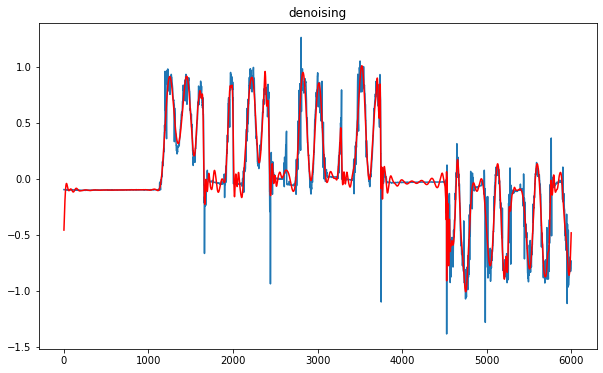

In [89]:
x = train_sit_up_add_time["ac1"].values[0:6000]
plt.figure(figsize=(10, 6))
plt.plot(x)
plt.plot(wavelet_denoising(x, 'coif14', 3, 2),'r')
plt.title("denoising")

In [90]:
# 滤波
sensor = ["og1","og2","og3","ag1","ag2","ag3","ac1","ac2","ac3"]
train_sit_up_add_time_filtered = train_sit_up_add_time.copy()
for name in sensor:
    filtered_sensor = wavelet_denoising(train_sit_up_add_time_filtered[name].values, 'coif14', 3, 2) 
    train_sit_up_add_time_filtered.loc[:,[name]] = filtered_sensor
train_sit_up_add_time_filtered

,Time,og1,og2,og3,ag1,ag2,ag3,ac1,ac2,ac3,sample index
0,1,-8.121702,18.675209,-7.332289,135.651656,6.009316,-42.506741,-0.204012,0.023455,-0.959879,1.0
1,2,-7.409802,17.541761,-6.752220,107.781198,8.987632,-43.224839,-0.204454,0.029824,-0.962775,1.0
2,3,-6.706180,16.368854,-6.151987,197.649380,6.265516,-43.928482,-0.204869,0.036037,-0.965706,1.0
3,4,-6.012787,15.165463,-5.536188,195.657995,5.482493,-44.616783,-0.205256,0.042086,-0.968681,1.0
4,5,-5.330567,13.940391,-4.909400,165.986498,6.258849,-45.288899,-0.205613,0.047964,-0.971705,1.0
...,...,...,...,...,...,...,...,...,...,...,...
63995,1996,-11.642770,23.427608,-9.770172,-209.687958,18.354050,-38.733218,-0.201450,-0.010299,-0.945594,32.0
63996,1997,-10.966754,22.630290,-9.359288,-157.580750,17.739733,-39.508937,-0.202004,-0.003344,-0.948467,32.0
63997,1998,-10.268143,21.746986,-8.905612,-110.075576,16.168714,-40.275196,-0.202539,0.003526,-0.951318,32.0
63998,1999,-9.556224,20.787114,-8.413551,-123.700538,14.766586,-41.030934,-0.203053,0.010293,-0.954162,32.0


In [7]:
train_sit_up_add_time.to_csv("../Datasets/sit-ups/"+"train_sit_up_.csv", sep=',', header=None, index=None)

In [91]:
train_extracted_features = extract_features(train_sit_up_add_time_filtered,
                                      column_id="sample index",
                                        column_sort="Time",
                                         default_fc_parameters =EfficientFCParameters())

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 36/36 [00:27<00:00,  1.31it/s]


In [92]:
feature_raw=train_extracted_features.reset_index(drop=True)
feature_raw.index+=1
feature_raw

,ac3__variance_larger_than_standard_deviation,ac3__has_duplicate_max,ac3__has_duplicate_min,ac3__has_duplicate,ac3__sum_values,ac3__abs_energy,ac3__mean_abs_change,ac3__mean_change,ac3__mean_second_derivative_central,ac3__median,...,ac2__permutation_entropy__dimension_6__tau_1,ac2__permutation_entropy__dimension_7__tau_1,ac2__query_similarity_count__query_None__threshold_0.0,"ac2__matrix_profile__feature_""min""__threshold_0.98","ac2__matrix_profile__feature_""max""__threshold_0.98","ac2__matrix_profile__feature_""mean""__threshold_0.98","ac2__matrix_profile__feature_""median""__threshold_0.98","ac2__matrix_profile__feature_""25""__threshold_0.98","ac2__matrix_profile__feature_""75""__threshold_0.98",ac2__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,0.0,0.0,-1404.584050,1598.749950,0.010268,0.000397,-1.568224e-05,-0.962829,...,1.063879,1.139328,NaN,4.531656,22.715300,13.355179,13.927097,9.341380,16.646661,1.153128
2,0.0,0.0,0.0,0.0,-1094.590537,1481.792941,0.037290,-0.000376,1.946165e-05,-0.900530,...,1.529045,1.726497,NaN,4.365639,27.295879,10.242667,9.567179,6.120395,10.861822,2.754281
3,0.0,0.0,0.0,0.0,-958.596413,1588.621101,0.036701,0.000701,1.848136e-06,-0.898198,...,1.023752,1.109432,NaN,4.274463,22.438999,7.559804,5.920462,5.329761,6.396033,1.060290
4,0.0,0.0,0.0,0.0,-597.684482,1555.033432,0.047015,-0.000582,8.180354e-06,-0.284193,...,1.113288,1.195540,NaN,6.408610,9.860985,8.074844,8.065603,7.633575,8.597121,1.062837
5,0.0,0.0,0.0,0.0,-970.593325,2011.641149,0.056144,-0.000132,-1.049387e-05,-0.926974,...,1.324139,1.465399,NaN,3.863140,19.588615,8.990195,8.505976,5.724161,11.399857,1.673033
6,0.0,0.0,0.0,0.0,-1045.879576,1863.218749,0.046468,0.000705,7.313000e-06,-0.934370,...,1.313841,1.449411,NaN,3.811755,18.737005,9.280375,8.158904,5.608534,12.227040,1.720758
7,0.0,0.0,0.0,0.0,-607.404315,1705.273996,0.054260,-0.000473,3.634994e-06,-0.354703,...,1.061051,1.153453,NaN,4.777970,14.503607,8.643283,6.577187,5.319229,12.154557,1.325608
8,0.0,0.0,0.0,0.0,-884.908814,1860.399238,0.049897,-0.000281,-7.985514e-06,-0.890682,...,1.129635,1.216442,NaN,4.118647,25.802706,9.268530,6.922779,5.657001,10.966103,1.001783
9,0.0,0.0,0.0,0.0,-830.977032,1592.711066,0.036648,0.000830,-2.334709e-06,-0.871992,...,0.950793,1.015154,NaN,5.430180,30.765907,9.929739,6.802058,6.438323,8.369271,1.062581
10,0.0,0.0,0.0,0.0,-527.353675,1657.202202,0.061053,-0.000814,-1.773351e-06,-0.115589,...,1.333784,1.481205,NaN,4.135349,13.481418,7.604582,6.200223,5.155783,9.824435,1.575302


In [93]:
p_values_mode=tsfresh.feature_selection.relevance.calculate_relevance_table(impute(feature_raw), 
                                                                       labels,ml_task='classification', 
                                                                            #fdr_level=1.105
                                                                           )

C:\ProgramData\Anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['ac3__query_similarity_count__query_None__threshold_0.0'
 'og1__query_similarity_count__query_None__threshold_0.0'
 'og2__query_similarity_count__query_None__threshold_0.0'
 'og3__query_similarity_count__query_None__threshold_0.0'
 'ag1__query_similarity_count__query_None__threshold_0.0'
 'ag2__query_similarity_count__query_None__threshold_0.0'
 'ag3__query_similarity_count__query_None__threshold_0.0'
 'ac1__query_similarity_count__query_None__threshold_0.0'
 'ac2__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [101]:
p_values_mode_=p_values_mode[abs(p_values_mode["p_value"])<1e-3].reset_index(drop=True)
select_names = p_values_mode_["feature"].values
select_names

array(['ac3__quantile__q_0.9',
       'og1__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'ac3__range_count__max_1000000000000.0__min_0',
       'ac3__count_below__t_0',
       'ac3__range_count__max_0__min_-1000000000000.0',
       'ac3__count_above__t_0',
       'og1__agg_autocorrelation__f_agg_"median"__maxlag_40',
       'og3__fft_aggregated__aggtype_"variance"',
       'og3__fft_aggregated__aggtype_"skew"',
       'ac3__variation_coefficient',
       'og3__fft_aggregated__aggtype_"kurtosis"', 'ac3__quantile__q_0.8',
       'og1__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'ac2__fft_coefficient__attr_"abs"__coeff_0', 'ac2__c3__lag_1',
       'ac3__ratio_beyond_r_sigma__r_0.5',
       'og3__fft_aggregated__aggtype_"centroid"', 'ac2__c3__lag_2',
       'ac2__c3__lag_3',
       'ac1__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'og3__benford_correlation',
       'ag2__fft_coefficient__attr_"abs"__coeff_5',
       'ac3__fft_coefficient__attr_"abs"__coeff_4',
  

In [100]:
feature_selected = feature_raw.loc[:,select_names]

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
features_extracted_minmax=scaler.fit_transform(feature_selected)

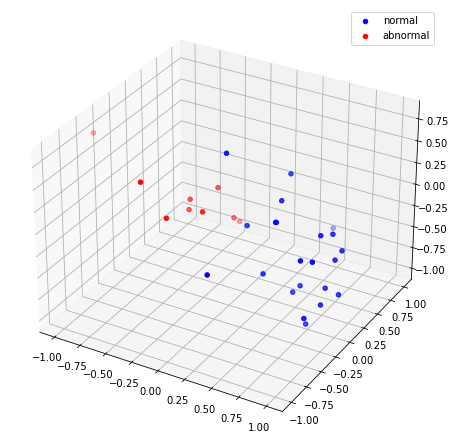

In [98]:
#plt.scatter(features_extracted_minmax[:,0],features_extracted_minmax[:,1],features_extracted_minmax[:,3])

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(features_extracted_minmax[0:22,0],features_extracted_minmax[0:22:,1],features_extracted_minmax[0:22:,3],
           color = "b", label = "normal")
ax.scatter(features_extracted_minmax[23:33,0],features_extracted_minmax[23:33:,1],features_extracted_minmax[23:33:,3],
           color = "r",label = "abnormal")
ax.legend()
plt.show()
